# Importing:

In [ ]:
# munging imports
import pandas as pd 
import numpy as np

# visualization imports
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier

# Collecting and Exploring:

In [ ]:
df=pd.read_csv("cardio_train.csv", sep=';')
print(type(df))

In [ ]:
df.head()

In [ ]:
cardio = df[df.cardio==1]
cardio.shape

In [ ]:
cardio = df[df.cardio==0]
cardio.shape

In [ ]:
# to check the data balance
df['cardio'].sum()/len(df) *100

In [ ]:
df.info()     

#### Data features:

ID: id number, int

Age: Objective Feature,int, age in days

Gender: Objective Feature, int, gender in categorical code "Female=1 , Male=2"

Height: Objective Feature,int, height in cm

Weight: Objective Feature,float, weightin in kg

Systolic blood pressure: Examination Feature, int, ap_hi

Diastolic blood pressure: Examination Feature, int, ap_lo

Cholesterol: Examination Feature, int, cholesterol "normal=1 , above normal=2, well above normal=3"

Glucose: Examination Feature,int, gluc "normal=1, above normal=2, well above normal=3"

Smoking: Subjective Feature, int, smoke in binary "smoke=1, not smoke=0"

Alcohol intake: Subjective Feature,int, alco in binary "drink=1, not drink=0"

Physical activity: Subjective Feature, int, active in binary "active=1 , not active=0"

Presence or absence of cardiovascular disease: Target Variable, int, cardio in binary "cardiovascular disease=1, no cardiovascular disease=0"

In [ ]:
df.describe()

#####  we can see that ap_hi has a min of  -150.000000 and ap_lo has min of -70.000000 which is wrong, there is no negative value of blood pressure. we can deticte that there is missing value.

##### also, min of weight is equal to 10km and min height is equal to 55cm for an adul. which in this case consedered as outliers and we can deal with it as replacing them with the mean of each of them depending on gender.

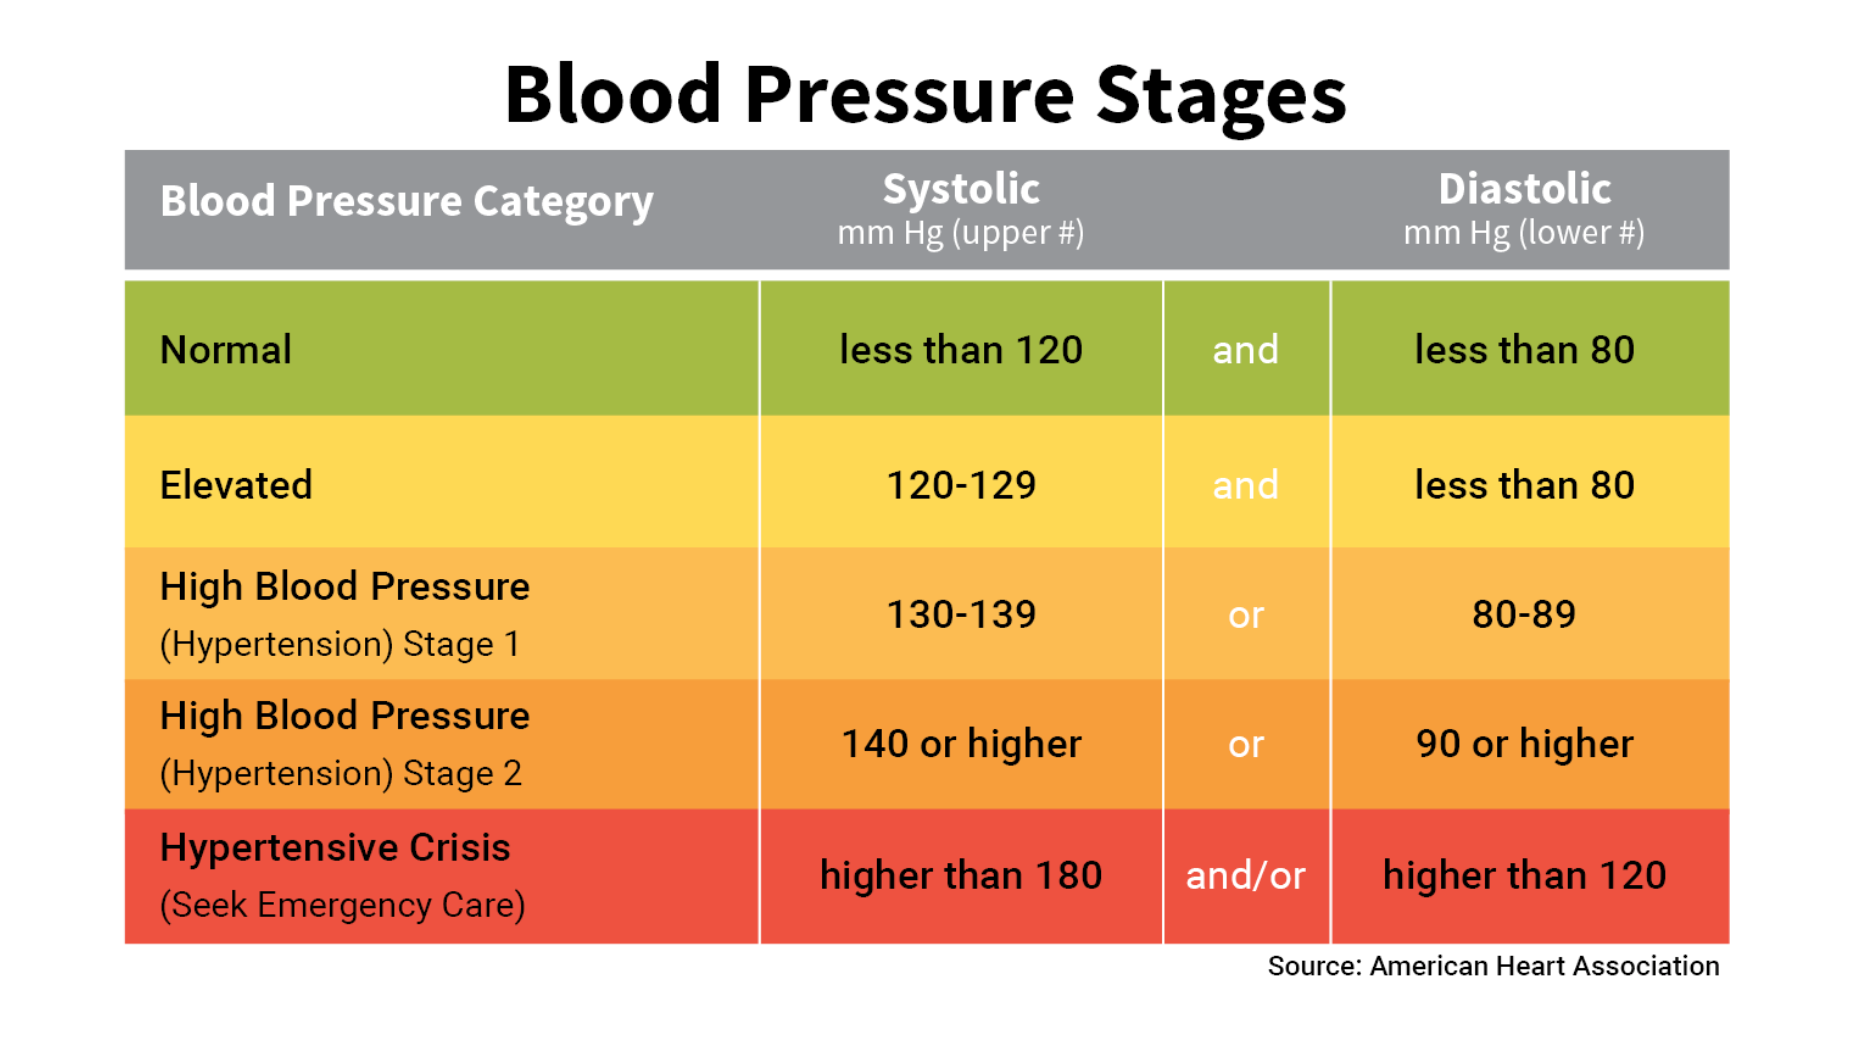

In [ ]:
df.drop(df.query('ap_hi >220 or ap_lo >180 or ap_hi<40 or ap_lo<40').index, axis=0, inplace=True)

In [ ]:
def bpstages(x,y):
    if x<=120 and y<=80:
        return 'normal'
    elif x<=129 and y<=80:
        return 'elevated'
    elif x<=139 or y<=89:
        return 'high stage 1'
    elif x<=180 or y<=120:
        return "high stage 2"
    elif x>180 or y>120:
        return 'hypertensive crisis'
    else:
        return None
    
df.insert(8, "BPC", df.apply(lambda row: bpstages(row['ap_hi'], row['ap_lo']), axis=1))
df['BPC'].value_counts()

#bpstages means blood pressure stages, and I categorized it according to the systolic and diastolic pressure.
#BPC means blood pressure categories, and I labled it based on the patients blood pressure like normal, elevated, high stage 1, high stage 2 or hypertensive crisis.

In [ ]:
df.head()

In [ ]:
BPCD=pd.get_dummies(df.BPC)
df=pd.concat([df,BPCD], axis=1)

In [ ]:
df.drop('BPC',axis='columns',inplace=True)

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df = df[df['height'] >= 150]
df[df['height'] > 200]

In [ ]:
df = df[df['weight'] >= 50]
df[df['weight'] > 190]

In [ ]:
df.drop(index=6486, inplace= True)

In [ ]:
df.describe()

In [ ]:
df.drop('id',axis='columns',inplace=True) #id is unnecessary featuer

In [ ]:
df['ageinyears'] = df['age'] / 365        #to change age from days to years
df= df.drop('age', axis=1)


In [ ]:
df.rename({"ageinyears":"age"},axis=1, inplace=True)

In [ ]:
df.sample(5)

In [ ]:
df.isna()

In [ ]:
df.dtypes

In [ ]:
# Gender: Female= 0  and Male=1
df['gender']=df['gender']-1

In [ ]:
df.head()

In [ ]:
df.describe().T[0:]

In here we can conclude that:

The percentage of males is 35% while the percentage of females is 65%.

The mean height of patients is 164.91 cm.

The mean weight of patients is 74.65 Kg.

The percentage of smokers is 8%.

The percentage of alcoholists is 5%.

The percentage of Active patients is 80%.

The mean age for patient is 53 years.

In [ ]:
#to check if still we have outliers in height and weight
plt.figure(figsize=(12,10))

he= plt.subplot(221)
he= plt.hist(df['height'], bins=50)
he= plt.title('height')

we= plt.subplot(222)
we= plt.hist(df['weight'], bins=50)
we= plt.title('weight')


In [ ]:
df.sample(6)

In [ ]:
df.info()

In [ ]:
df.duplicated().sum()   # to check if i have duplicate

In [ ]:
df.drop_duplicates(inplace=True)   # to remove the duplicate rows

In [ ]:
df.groupby('cardio').mean()

In [ ]:
plt.figure(figsize=(22,15))
sns.heatmap(df.corr(),annot=True ,cmap='Greens')
plt.show()

Looking into the correlation heatmap, and it seems like our target has higher correlation with gender,Hight ,smok,alco, active, elevated, hypertensive crisis.



In [ ]:
pd.crosstab(df['cardio'], df['gender']).plot(kind = 'bar')
plt.xlabel('no heart disease             heart disease')
plt.legend(['female','male'],loc='upper right')
plt.show()

##### according to the plot, we can see that male in both cases of having or not having a heart disease is almost the same value while female who has a heart disease is slightly lower than females who have it. also by comparing between of gender the mejority of heart disease patients are females with more than 20,000 patients.

In [ ]:
X=df[['age','height','gender','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','high stage 1','high stage 2','normal','hypertensive crisis','elevated']]
y=df['cardio']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=43)

In [ ]:
train_df = X_train.copy()
train_df['cardio'] = y_train
train_df.head()

In [ ]:
sns.pairplot(train_df, hue='cardio');

In [ ]:
sns.boxplot(x='cardio', y='age', data=train_df);

In [ ]:
# Logistic Regression

lr = LogisticRegression()
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

fit=lr.fit(X_train, y_train)
lr.score(X_test, y_test)

In [ ]:
lr.intercept_
lr.coef_

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
lr.score(X_test,y_test)

In [ ]:
sns.pairplot(df, hue='cardio');

In [ ]:
# Decision Tree

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
tree_reg.score(X_test,y_test)

In [ ]:
# KNN

knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)
knn.score(X_test,y_test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=2)

In [ ]:
# Gradient Boosting Machines

gbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=4,
                        objective='binary:logistic', 
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8
                       )

eval_set=[(X_train,y_train),(X_val,y_val)]
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='error', 
                    early_stopping_rounds=50,
                    verbose=True
                   )



In [ ]:
accuracy_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit)) 

In [ ]:
xgb.plot_importance(gbm)
xgb.plot_importance(gbm, importance_type='gain')

Gain views that normal blood pressure is the most important featuer while in frequency it is not.

In [ ]:
# Random Forest
rf= RandomForestClassifier(criterion = "entropy")
rf.fit(X_train, y_train)
rf.score(X_test,y_test)

In [ ]:
X = df.drop(["active"], axis = 1).values
y = df["active"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

In [ ]:
# Naive Bayes

nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

In [ ]:
X=df[['age','height','gender','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','high stage 1','high stage 2','normal','hypertensive crisis','elevated']]
y=df['cardio']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=43)
dummys= DummyClassifier(strategy="most_frequent")
dummys.fit(X_train, y_train)
dummys.score(X_test,y_test)